In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
import string
# from textblob import TextBlob
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from collections import Counter
import os

import matplotlib.pyplot as plt
import pyLDAvis

from gensim.corpora import Dictionary

import spacy
from math import nan
from itertools import chain
import gensim.models
from gensim.parsing.preprocessing import *
import pandas as pd

import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stop_words
import keras
from keras.preprocessing.text import one_hot, Tokenizer

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from keras.models import Model

# !python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import spacy
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()  # Visualise inside a notebook
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel



# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nlp = spacy.load('en_core_web_sm')
stop_words = gensim.parsing.preprocessing.STOPWORDS
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

import sqlite3 as sql
conn = sql.connect('data/outputDatabase.sqlite')



C:\Users\danie\anaconda3\envs\proj\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [196]:
from fcns import *

In [2]:
df = pd.read_sql('SELECT * FROM train', conn)

df['author_text'] = df['author'] + ' ' + df['title'] + ' ' + df['text']

df.drop(columns=['author', 'title', 'text', 'index'], inplace=True)

df.head()
# df['out'] = df['text'].apply(preprocess_text)
# df['out'][0]

label                                        author_text
0      1  Darrell Lucus House Dem Aide: We Didn’t Even S...
1      0  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2      1  Consortiumnews.com Why the Truth Might Get You...
3      1  Jessica Purkiss 15 Civilians Killed In Single ...
4      1  Howard Portnoy Iranian woman jailed for fictio...

In [4]:

from string import punctuation


def preprocess_text(text):
    text = text.lower()  # Lowercase text
    # text = re.sub(f"[{re.escape(punctuation)}]", "", remove_stopwords(text))

    text = remove_stopwords(text, stopwords=stop_words)
    text = strip_non_alphanum(text)
    text = strip_short(text, 3)
    text = "".join(text)  # Remove extra spaces, tabs, and new lines
    return text


# a=df['text'].apply(lambda x : [''.join(w) for w in x.split() if w not in stop_words])
df['author_text_clean'] = df['author_text'].apply(preprocess_text)
df

label                                        author_text                                  author_text_clean
0          1  Darrell Lucus House Dem Aide: We Didn’t Even S...  darrell lucus house dem aide didn comey letter...
1          0  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...  daniel flynn flynn hillary clinton big woman c...
2          1  Consortiumnews.com Why the Truth Might Get You...  consortiumnews com truth fired truth fired oct...
3          1  Jessica Purkiss 15 Civilians Killed In Single ...  jessica purkiss civilians killed single airstr...
4          1  Howard Portnoy Iranian woman jailed for fictio...  howard portnoy iranian woman jailed fictional ...
...      ...                                                ...                                                ...
20782      0  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...  jerome hudson rapper trump poster child white ...
20783      0  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...  benjamin hoffman playoffs schedule matchups od...
20784      0  Michael J. de la Merced and Rachel Abrams Macy...  michael merced rachel abrams macy said receive...
20785      1  Alex Ansary NATO, Russia To Hold Parallel Exer...  alex ansary nato russia hold parallel exercise...
20786      1  David Swanson What Keeps the F-35 Alive David ...  david swanson keeps alive david swanson author...

[20787 rows x 3 columns]

In [6]:
def is_ascii(letter):
    letter = letter[0]

    if letter in string.ascii_letters:
        return True
    return False


df['rem'] = df['author_text_clean'].apply(is_ascii)

df = df[df['rem'] == True]


C:\Users\danie\AppData\Local\Temp/ipykernel_13852/2030850970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rem'] = df['author_text_clean'].apply(is_ascii)


In [7]:

# CUSTOM_FILTERS = [
#     remove_stopwords,
#     strip_non_alphanum,
#     strip_multiple_whitespaces,
#     strip_short,
#     stem_text
# ]

tokens = [preprocess_string(doc) for doc in df['author_text_clean']]
tokens

[['darrel',
  'lucu',
  'hous',
  'dem',
  'aid',
  'comei',
  'letter',
  'jason',
  'chaffetz',
  'tweet',
  'hous',
  'dem',
  'aid',
  'comei',
  'letter',
  'jason',
  'chaffetz',
  'tweet',
  'darrel',
  'lucu',
  'octob',
  'subscrib',
  'jason',
  'chaffetz',
  'stump',
  'american',
  'fork',
  'utah',
  'imag',
  'courtesi',
  'michael',
  'jollei',
  'avail',
  'creativ',
  'common',
  'licens',
  'apolog',
  'keith',
  'olbermann',
  'doubt',
  'worst',
  'person',
  'world',
  'week',
  'fbi',
  'director',
  'jame',
  'comei',
  'accord',
  'hous',
  'democrat',
  'aid',
  'look',
  'like',
  'know',
  'second',
  'worst',
  'person',
  'turn',
  'comei',
  'sent',
  'infam',
  'letter',
  'announc',
  'fbi',
  'look',
  'email',
  'relat',
  'hillari',
  'clinton',
  'email',
  'server',
  'rank',
  'democrat',
  'relev',
  'committe',
  'hear',
  'comei',
  'tweet',
  'republican',
  'committe',
  'chairmen',
  'know',
  'comei',
  'notifi',
  'republican',
  'chairmen'

In [39]:
df['tokens'] = tokens

all_words = list(chain.from_iterable(df['tokens']))
num_words = len(set(all_words))
new_words = []
removal = []

for word in set(all_words):
    # word = strip_non_alphanum(word)
    word = word.lstrip()
    # print(word)
    if not is_ascii(word[0]):
        removal.append(word)

for word in set(all_words):
    if word not in removal:
        new_words.append(word)



In [46]:
num_words = len(list(new_words))

print(
    f'all words: {len(list(all_words))}\n'
    f'unique words: {num_words}'
)

all words: 7624820
unique words: 112210


In [47]:
x_train, x_test, y_train, y_test = tts(df['author_text_clean'], df['label'], test_size=0.2)


In [48]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
trainings = tokenizer.texts_to_sequences(x_train)
testings = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(trainings, maxlen=40, padding='post', truncating='post')
padded_test = pad_sequences(testings, maxlen=40, truncating='post')

In [49]:
model = Sequential()
model.add(Embedding(num_words, output_dim=128))
model.add(Bidirectional(LSTM(128)))

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         14362880  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,659,073
Trainable params: 14,659,073
Non-trainable params: 0
_________________________________________________________________


In [50]:
y_train = np.asarray(y_train)

model.fit(
    padded_train,
    y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=2,
    validation_data=(x_test, y_test),
    use_multiprocessing=True
)

Epoch 1/2
234/234 [==============================] - 27s 107ms/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.0582 - val_accuracy: 0.9861
Epoch 2/2
234/234 [==============================] - 23s 100ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0517 - val_accuracy: 0.9885


In [197]:
mydict = Dictionary(df['tokens'])

mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokens]

word_counts = [[(mydict[id], count) for id, count in line]
               for line in mycorpus]


In [198]:
# words =[[(mydict[i], freq) for i, freq in doc] for doc in tokens[i]]
word_counts

[[('ablaz', 1),
  ('abus', 1),
  ('accord', 3),
  ('act', 1),
  ('actual', 1),
  ('advanc', 1),
  ('agenc', 1),
  ('aid', 6),
  ('american', 1),
  ('anchor', 1),
  ('announc', 1),
  ('answer', 1),
  ('anthoni', 1),
  ('apolog', 1),
  ('appar', 2),
  ('appear', 1),
  ('attempt', 1),
  ('avail', 1),
  ('basic', 1),
  ('bipartisanship', 1),
  ('boss', 1),
  ('briefli', 1),
  ('bui', 1),
  ('burton', 1),
  ('carolina', 1),
  ('case', 4),
  ('chaffetz', 15),
  ('chairman', 2),
  ('chairmen', 4),
  ('charismat', 1),
  ('check', 1),
  ('christian', 2),
  ('classifi', 1),
  ('click', 1),
  ('clinton', 1),
  ('colleagu', 1),
  ('colleg', 1),
  ('comei', 11),
  ('committe', 7),
  ('common', 1),
  ('connect', 2),
  ('consid', 1),
  ('contain', 1),
  ('control', 1),
  ('cook', 1),
  ('cooler', 1),
  ('counterpart', 1),
  ('cours', 1),
  ('courtesi', 2),
  ('creativ', 1),
  ('cum', 1),
  ('daili', 2),
  ('dan', 1),
  ('darrel', 6),
  ('darrelllucu', 1),
  ('deaf', 1),
  ('decenc', 1),
  ('dem', 3),

In [230]:
# from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
lda_topics = vect.fit_transform(df['author_text_clean'].values.astype('U'))

In [200]:
# from gensim import models, similarities
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()


lda_model = LdaMulticore(
    corpus=mycorpus,
    id2word=mydict,
    random_state=42,
    num_topics=7,
    passes=10,
    chunksize=1000,
    batch=False,
    alpha='asymmetric',
    decay=0.5,
    offset=64,
    eta=None,
    eval_every=0,
    iterations=100,
    gamma_threshold=0.001,
    per_word_topics=True
)
# save the model
# lda_model.save('lda_model.model')
# for item in tf_idf[mycorpus]:
#         print([[mydict[id], np.around(freq, decimals=2)] for id, freq in item])
vis = gensimvis.prepare(lda_model, mycorpus, mydict)


C:\Users\danie\anaconda3\envs\proj\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [201]:
my_dict = {
    'Topic ' + str(i):
        [token for token, score in lda_model.show_topic(i, topn=10)]
    for i in range(lda_model.num_topics)
}

for k, v in my_dict.items():
    print(
        f'{k} top words are:\n {v}\n'
    )

Topic 0 top words are:
 ['trump', 'clinton', 'said', 'state', 'presid', 'new', 'elect', 'hillari', 'peopl', 'american']

Topic 1 top words are:
 ['trump', 'new', 'said', 'time', 'year', 'compani', 'peopl', 'like', 'presid', 'twitter']

Topic 2 top words are:
 ['immigr', 'said', 'border', 'illeg', 'new', 'state', 'report', 'texa', 'breitbart', 'migrant']

Topic 3 top words are:
 ['said', 'new', 'time', 'like', 'year', 'peopl', 'polic', 'dai', 'york', 'work']

Topic 4 top words are:
 ['que', 'lo', 'del', 'la', 'por', 'para', 'una', 'como', 'má', 'said']

Topic 5 top words are:
 ['vaccin', 'zika', 'said', 'van', 'viru', 'new', 'cdc', 'infect', 'trump', 'mosquito']

Topic 6 top words are:
 ['said', 'state', 'year', 'new', 'peopl', 'time', 'govern', 'like', 'unit', 'work']



In [202]:
from sklearn.manifold import TSNE

lda_model_2 = LatentDirichletAllocation(
    # n_components=n_topics, 
    # learning_method='online',
    random_state=42,
    # verbose=0
)


In [203]:

lda_matrix = lda_model_2.fit_transform(lda_topics)
tsne_model = TSNE(verbose=1)
tsne_vectors= tsne_model.fit_transform(lda_matrix)


C:\Users\danie\anaconda3\envs\proj\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\danie\anaconda3\envs\proj\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20728 samples in 0.037s...
[t-SNE] Computed neighbors for 20728 samples in 2.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20728
[t-SNE] Computed conditional probabilities for sample 2000 / 20728
[t-SNE] Computed conditional probabilities for sample 3000 / 20728
[t-SNE] Computed conditional probabilities for sample 4000 / 20728
[t-SNE] Computed conditional probabilities for sample 5000 / 20728
[t-SNE] Computed conditional probabilities for sample 6000 / 20728
[t-SNE] Computed conditional probabilities for sample 7000 / 20728
[t-SNE] Computed conditional probabilities for sample 8000 / 20728
[t-SNE] Computed conditional probabilities for sample 9000 / 20728
[t-SNE] Computed conditional probabilities for sample 10000 / 20728
[t-SNE] Computed conditional probabilities for sample 11000 / 20728
[t-SNE] Computed conditional probabilities for sample 12000 / 20728
[t-SNE] Computed conditional probabilities for sam

In [236]:
n_topics = 7

lda_keys = get_keys(lda_matrix)

lda_categories, lda_counts = keys_to_counts(lda_keys)

In [261]:

lda_matrix

# top_n_words_lda = get_top_n_words(5, vect, mycorpus)

# for i in range(len(top_n_words_lda)):
#     print("Topic {}: ".format(i+1), top_n_words_lda[i])
# top_n_words_lda

array([[2.39884763e-04, 3.17618277e-01, 2.39859016e-04, ...,
        2.39890085e-04, 1.34661451e-02, 2.39883731e-04],
       [2.93355096e-04, 2.93325442e-04, 2.93336542e-04, ...,
        2.93321079e-04, 2.55093453e-01, 1.22274302e-01],
       [1.75228274e-02, 1.58134087e-01, 1.61591112e-04, ...,
        1.61603101e-04, 1.61593266e-04, 6.06411324e-01],
       ...,
       [2.30452034e-04, 2.30454003e-04, 2.30486622e-04, ...,
        8.37978461e-01, 2.30482904e-04, 2.30463773e-04],
       [5.81500814e-04, 5.81573193e-04, 5.81522546e-04, ...,
        5.81540770e-04, 5.81508855e-04, 5.81573706e-04],
       [9.68306229e-02, 1.61081150e-04, 1.61080003e-04, ...,
        9.19635707e-02, 1.61068574e-04, 2.80919559e-01]])

In [253]:
# top_3_words = get_top_n_words2(3, lda_keys, lda_matrix, vect)
# labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_vectors)

tsne_vectors
lda_keys

[5,
 5,
 9,
 3,
 1,
 5,
 8,
 7,
 7,
 7,
 5,
 8,
 9,
 5,
 9,
 8,
 7,
 6,
 7,
 5,
 5,
 8,
 5,
 2,
 0,
 3,
 3,
 5,
 1,
 5,
 5,
 3,
 7,
 6,
 7,
 9,
 5,
 9,
 2,
 0,
 0,
 0,
 6,
 8,
 1,
 5,
 3,
 4,
 2,
 7,
 0,
 4,
 2,
 9,
 5,
 9,
 4,
 9,
 5,
 0,
 7,
 9,
 0,
 9,
 8,
 3,
 1,
 4,
 5,
 5,
 0,
 3,
 5,
 8,
 6,
 5,
 2,
 1,
 3,
 5,
 6,
 7,
 4,
 8,
 1,
 8,
 0,
 5,
 5,
 8,
 8,
 7,
 1,
 5,
 7,
 3,
 0,
 5,
 1,
 7,
 9,
 7,
 5,
 5,
 1,
 6,
 1,
 3,
 1,
 6,
 5,
 8,
 5,
 6,
 4,
 8,
 8,
 6,
 8,
 7,
 9,
 5,
 9,
 6,
 9,
 9,
 1,
 0,
 3,
 5,
 5,
 0,
 5,
 7,
 3,
 5,
 5,
 1,
 6,
 6,
 1,
 7,
 8,
 9,
 5,
 4,
 3,
 2,
 5,
 3,
 5,
 5,
 2,
 8,
 5,
 7,
 3,
 7,
 5,
 6,
 2,
 6,
 0,
 3,
 9,
 7,
 7,
 8,
 2,
 2,
 9,
 7,
 0,
 5,
 8,
 0,
 5,
 5,
 5,
 8,
 3,
 8,
 0,
 3,
 1,
 0,
 3,
 5,
 3,
 7,
 3,
 6,
 1,
 0,
 3,
 2,
 2,
 2,
 9,
 5,
 6,
 0,
 5,
 5,
 5,
 1,
 5,
 9,
 8,
 9,
 9,
 5,
 5,
 5,
 9,
 7,
 8,
 5,
 5,
 7,
 9,
 9,
 5,
 0,
 3,
 2,
 5,
 7,
 9,
 4,
 2,
 8,
 7,
 8,
 5,
 7,
 1,
 3,
 1,
 0,
 8,
 7,
 5,
 7,
 1,
 7,
 5,
 0,
 9,
 7,


NameError: name 'Label' is not defined

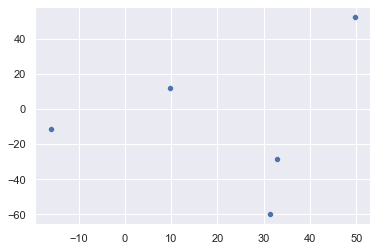

In [248]:
fig = plt.figure()

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

sns.scatterplot(x=tsne_vectors[:5,0], y=tsne_vectors[:5,1])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

In [191]:

coherence_model_lda = CoherenceModel(
    model=lda_model, texts=mycorpus, dictionary=mydict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

C:\Users\danie\anaconda3\envs\proj\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\danie\anaconda3\envs\proj\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\danie\anaconda3\envs\proj\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


In [192]:
coherence_lda

nan